# By Yifeng Luo

# **Data preprocessing**

- get each file's encode

In [23]:
import numpy as np 
import pandas as pd 
import chardet

In [24]:
def get_encoding(file):
    with open(file, 'rb') as f:
        return chardet.detect(f.read())['encoding']

In [5]:
encode = get_encoding('./data/1afterlabel.csv')
encode

'UTF-8-SIG'

In [10]:
encode = get_encoding('./data/so_sample_labelled.csv')
encode

'utf-8'

- open them

In [25]:
# the en csv
df1 = pd.read_csv('./data/1afterlabel.csv', encoding='UTF-8-SIG')
df1.head(1)

,标题／微博内容,信息属性,原创/转发,发布日期,原微博内容,认证类型,地域,城市,性别,全文内容,...,精准地域,中图地址,MD5-作者ID,MD5-mid,MD5-根微博mid,MD5-根微博用户UID,MD5-父微博ID,MD5-父微博用户ID,Unnamed: 25,bot
0,??,非敏感,转发,10/12/2020 16:29,@微博篮球 【转发抽湖人队帽衫】#为湖人夺冠换头像# ?湖！人！总！冠！军！?让我们一起更换...,普通,河北,石家庄,女,?? 【原微博】 @微博篮球 【转发抽湖人队帽衫】#为湖人夺冠换头像# ?湖！人！总！冠！军...,...,其他,[http://wx2.sinaimg.cn/bmiddle/00368BvZly1gjmd...,ffe0af798cc0a24f9fcca68e024de14f,08116557b1ff6203df59e9639327b501,828dc281f4581e0aa111c1ff90e14d4e,197f27361493e117d37977fea562d68e,828dc281f4581e0aa111c1ff90e14d4e,197f27361493e117d37977fea562d68e,NaN,1


In [35]:
# co csv
df2 = pd.read_csv('./data/co_sample.csv', encoding='utf8')
df2.head(1)

,label,标题／微博内容,信息属性,原创/转发,发布日期,原微博内容,认证类型,地域,城市,性别,...,话题,微博情绪,精准地域,中图地址,MD5-作者ID,MD5-mid,MD5-根微博mid,MD5-根微博用户UID,MD5-父微博ID,MD5-父微博用户ID
0,1.0,#腾讯中午的辣椒酱突然不香了##3人伪造老干妈印章与腾讯签合同# 【一瓶老干妈】淼哥读大学的...,非敏感,原创,7/1/2020 19:17,,金V,广东,,男,...,3人伪造老干妈印章与腾讯签合同;腾讯中午的辣椒酱突然不香了,喜悦,其他,[http://wx4.sinaimg.cn/bmiddle/853f0ed3gy1ggbo...,3e94630b688b7a8126ab1842d455081d,bcc71eb264dbca5337dfd00d3f64561d,NaN,NaN,NaN,NaN


In [36]:
# so_sample_labelled

df3 = pd.read_csv('./data/so_sample_labelled.csv', encoding='utf-8')
df3.head(1)

,bot,标题／微博内容,信息属性,原创/转发,发布日期,原微博内容,认证类型,地域,城市,性别,...,话题,微博情绪,精准地域,中图地址,MD5-作者ID,MD5-mid,MD5-根微博mid,MD5-根微博用户UID,MD5-父微博ID,MD5-父微博用户ID
0,0,家在小区尽头，快递站在小区里有好多个点偏偏放另外一个尽头的丰巢我每次都要走10分钟[doge...,非敏感,转发,5/9/2020 12:07,@蓝鲸财经记者工作平台 【#上海众小区联合抵制丰巢收费#，#丰巢称全国性措施暂不会改#】近日...,普通,上海,,女,...,丰巢称全国性措施暂不会改;上海众小区联合抵制丰巢收费;杭州一小区因超时费停用丰巢,悲伤,"上海市,上海",[http://wx3.sinaimg.cn/bmiddle/7061c249ly1gem0...,ff2bfbcb9da665d955cc9bffc80d2d87,ac006a168e14921704f93f6324f61e5e,80fe094e68fbc6b90528eae261a88be8,8643242d6d135c772a51b8b7f3bd0008,80fe094e68fbc6b90528eae261a88be8,8643242d6d135c772a51b8b7f3bd0008


### put them into one df

In [37]:
df1 = df1[['bot', '原微博内容']]
df2 = df2[['label', '原微博内容']]
df3 = df3[['bot', '原微博内容']]

In [42]:
def rename_col(df):
    df.columns = ['bot', 'text']
    return df

df1 = rename_col(df1)
df2 = rename_col(df2)
df3 = rename_col(df3)

In [56]:
# modify df2 a bit 
df2['bot'] = df2['bot'].fillna(0)

In [58]:
df2['bot'] = pd.to_numeric(df2['bot'], downcast='integer')
df2.head()

,bot,text
0,1,
1,1,
2,1,
3,1,
4,1,@百度搜索 手里的瓜突然不香了……有一说一，这事与我无关。请大家不传谣不信谣，理性吃瓜。#3...


In [59]:
df = df1.append(df2)
df = df.append(df3)
print(df.shape)

(5394, 2)


In [61]:
df.head(5)

,bot,text
0,1,@微博篮球 【转发抽湖人队帽衫】#为湖人夺冠换头像# ?湖！人！总！冠！军！?让我们一起更换...
1,1,@体育小球迷迷妹 #体育# [cp]#十年对比大赏# 跟随视频，回顾十年前后，湖人夺得总冠...
2,0,@星娱 #乘风破浪的姐姐成团之夜# 乐华七子加油秀《Blah-Blan丛林法则》朱正廷、范丞...
3,0,@乘风破浪的姐姐 原创音乐制作人、公演舞台《情人》原唱惊喜亮相[打call]@蔡徐坤 一起乘...
4,1,@综艺少女李大嘴 #姐姐成团之夜嘉宾阵容##蔡徐坤参加姐姐成团之夜# 《乘风破浪的姐姐》公布...


- train set: 0.8
- test set: 0.1
- validation set: 0.1

choose 66 as the random state for sklearn model train_test_split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test_dev, y_train, y_test_dev = train_test_split(df.text, df.bot, test_size=0.2, random_state=66)


In [66]:
# training csv
train_df = dict()
train_df['text'] = X_train
train_df['label'] = y_train
train_df = pd.DataFrame(train_df)
train_df.head()

,label,text
73,0,@淘宝 #天猫双十一成交总额4982亿#谢谢有你！给参与了千亿大项目的你回回血！关?转，揪一...
1203,0,@游研社 腾讯官方发了这么个视频……#3人伪造老干妈印章与腾讯签合同# http://t....
1885,1,@TFBOYS-王俊凯 #英雄联盟9周年#因为热爱，所以联盟！未来，和所有召唤师，战在一起！...
1824,1,
545,1,@TFBOYS-王俊凯 #英雄联盟9周年#因为热爱，所以联盟！未来，和所有召唤师，战在一起！...


In [67]:
train_df.to_csv('./data/training_data.csv', index=False)

In [69]:
# dev test csv
X_test, X_dev, y_test, y_dev = train_test_split(X_test_dev, y_test_dev, test_size=0.5, random_state=66)

In [70]:
# test_csv dev_csv

test_df = dict()
dev_df = dict()

test_df['text'] = X_test
test_df['label'] = y_test

dev_df['text'] = X_dev
dev_df['label'] = y_dev

test_df = pd.DataFrame(test_df)
dev_df = pd.DataFrame(dev_df)

In [72]:
test_df.to_csv('./data/test_date.csv', index=False)
dev_df.to_csv('./data/dev_data.csv', index=False)

#  Data EXP

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

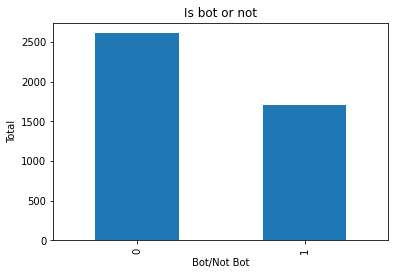

In [86]:
# training data
is_bot = pd.value_counts(train_df['label'], sort=True).sort_index()
is_bot.plot(kind='bar')
plt.title('Is bot or not')
plt.xlabel('Bot/Not Bot')
plt.ylabel('Total')
plt.show()